In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns

In [29]:
df_pvr = quandl.get('NSE/PVR')
df = pd.DataFrame(df_pvr)

In [30]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2006-01-04,270.0,309.40,270.00,292.25,294.95,13493309.0,40264.55
2006-01-05,297.0,299.50,280.25,281.95,282.60,2561756.0,7432.69
2006-01-06,282.9,283.85,271.05,273.00,275.45,1458627.0,4039.18
2006-01-09,275.2,282.40,272.55,280.35,280.00,768134.0,2135.75
2006-01-10,281.1,290.00,278.25,280.00,280.10,703707.0,1995.83


In [31]:
df.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-31,1590.00,1611.70,1586.65,1599.00,1604.55,485188.0,7778.87
2019-01-01,1600.10,1604.55,1579.15,1599.00,1594.60,154865.0,2463.18
2019-01-02,1585.35,1604.90,1577.05,1586.00,1587.55,237215.0,3774.06
2019-01-03,1590.00,1611.50,1518.00,1531.05,1530.70,613132.0,9561.72
2019-01-04,1535.50,1576.95,1501.10,1573.00,1573.20,764568.0,11764.33


In [32]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,3223.000000,3223.000000,3223.000000,3223.000000,3223.000000,3.223000e+03,3223.000000
mean,515.640071,525.325318,505.713155,514.697285,514.604111,1.336660e+05,991.334009
std,453.337535,459.885573,446.263921,452.874792,452.769862,3.866986e+05,2810.920380
min,62.000000,63.700000,58.200000,62.500000,61.300000,5.000000e+01,0.050000
25%,166.475000,170.925000,162.075000,166.000000,165.700000,2.039200e+04,40.820000
50%,273.800000,281.000000,265.000000,273.000000,273.050000,5.540400e+04,161.570000
75%,758.950000,779.725000,741.350000,761.250000,759.050000,1.409865e+05,860.560000
max,1635.000000,1655.000000,1603.600000,1620.000000,1613.100000,1.349331e+07,76033.530000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3223 entries, 2006-01-04 to 2019-01-04
Data columns (total 7 columns):
Open                    3223 non-null float64
High                    3223 non-null float64
Low                     3223 non-null float64
Last                    3223 non-null float64
Close                   3223 non-null float64
Total Trade Quantity    3223 non-null float64
Turnover (Lacs)         3223 non-null float64
dtypes: float64(7)
memory usage: 201.4 KB


In [34]:
df.rename(columns={'Total Trade Quantity':'Volume'},inplace=True)

In [35]:
def shiftby1(price):
    return price.shift(1)

In [36]:
df['Open_1'] = shiftby1(df['Open'])
df['High_1'] = shiftby1(df['High'])
df['Low_1'] = shiftby1(df['Low'])
df['Close_1'] = shiftby1(df['Close'])
df['Volume_1'] = shiftby1(df['Volume'])

In [37]:
df['avg_price_7'] = df['Close'].rolling(window = 5).mean().shift(1)
df['avg_price_30'] = df['Close'].rolling(window = 21).mean().shift(1)
df['avg_price_365'] =df['Close'].rolling(window = 365).mean().shift(1)

In [38]:
df['ratio_avg_price_7_30'] = df['avg_price_7']/df['avg_price_30']
df['ratio_avg_price_7_365'] = df['avg_price_7']/df['avg_price_365']
df['ratio_avg_price_30_365'] = df['avg_price_30']/df['avg_price_365']

In [39]:
df['avg_Volume_7'] = df['Volume'].rolling(window = 5).mean().shift(1)
df['avg_Volume_30'] = df['Volume'].rolling(window = 21).mean().shift(1)
df['avg_Volume_365'] = df['Volume'].rolling(window = 252).mean().shift(1)

In [40]:
df['ratio_avg_Volume_7_30'] = df['avg_Volume_7']/df['avg_Volume_30']
df['ratio_avg_Volume_7_365'] = df['avg_Volume_7']/df['avg_Volume_365']
df['ratio_avg_Volume_30_365'] = df['avg_Volume_30']/df['avg_Volume_365']

In [41]:
df['std_price_7'] = df['Close'].rolling(window = 5).std().shift(1)
df['std_price_30'] = df['Close'].rolling(window = 21).std().shift(1)
df['std_price_365'] =df['Close'].rolling(window = 252).std().shift(1)

In [42]:
df['ratio_std_price_7_30'] = df['std_price_7']/df['std_price_30']
df['ratio_std_price_7_365'] = df['std_price_7']/df['std_price_365']
df['ratio_std_price_30_365'] = df['std_price_30']/df['std_price_365']

In [43]:
df['std_Volume_7'] = df['Volume'].rolling(window = 5).std().shift(1)
df['std_Volume_30'] = df['Volume'].rolling(window = 21).std().shift(1)
df['std_Volume_365'] = df['Volume'].rolling(window = 252).std().shift(1)

In [44]:
df['ratio_std_Volume_7_30'] = df['std_Volume_7']/df['std_Volume_30']
df['ratio_std_Volume_7_365'] = df['std_Volume_7']/df['std_Volume_365']
df['ratio_std_Volume_30_365'] = df['std_Volume_30']/df['std_Volume_365']

In [45]:
df['return_1'] = ((df['Close']-df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
df['return_7'] = ((df['Close']-df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
df['return_30'] = ((df['Close']-df['Close'].shift(21))/df['Close'].shift(21)).shift(1)
df['return_365'] = ((df['Close']-df['Close'].shift(252))/df['Close'].shift(252)).shift(1)

In [46]:
df['moving_avg_7'] = df['return_7'].rolling(window=5).mean()
df['moving_avg_30'] =df['return_30'].rolling(window=21).mean()
df['moving_avg_365'] = df['return_365'].rolling(window=252).mean()

In [47]:
df=df.dropna(axis=0)
df.drop(df[['Turnover (Lacs)','Last']],axis=1,inplace=True)

In [48]:
X=df.drop('Close',axis=1)
y=df['Close']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_trans,y,test_size=0.3,random_state=42)

In [52]:
linear = SGDRegressor()
linear.fit(X_train,y_train)
predict = linear.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [53]:
print('MSE:{0:0.3f}'.format(mean_squared_error(y_test,predict)))
print('RMSE:{0:0.3f}'.format(np.sqrt(mean_squared_error(y_test,predict))))
print('MAE:{0:0.3f}'.format(mean_absolute_error(y_test,predict)))
print('R^2:{0:0.3f}'.format(r2_score(y_test,predict)))

MSE:236.308
RMSE:15.372
MAE:10.781
R^2:0.999


In [54]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

In [55]:
print('MSE:{0:0.3f}'.format(mean_squared_error(y_test,predict)))
print('RMSE:{0:0.3f}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
print('MAE:{0:0.3f}'.format(mean_absolute_error(y_test,predictions)))
print('R^2:{0:0.3f}'.format(r2_score(y_test,predictions)))

MSE:236.308
RMSE:12.295
MAE:7.566
R^2:0.999


In [56]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree_train,tree_test,target_train,target_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
tree.fit(tree_train,target_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
pred=tree.predict(tree_test)

In [59]:
print('MSE:{0:0.3f}'.format(mean_squared_error(y_test,pred)))
print('RMSE:{0:0.3f}'.format(np.sqrt(mean_squared_error(y_test,pred))))
print('MAE:{0:0.3f}'.format(mean_absolute_error(y_test,pred)))
print('R^2:{0:0.3f}'.format(r2_score(y_test,pred)))

MSE:134.277
RMSE:11.588
MAE:6.951
R^2:0.999


In [60]:
df_performance = df[-100:]

In [61]:
x_performance = df_performance.drop(['Close'],axis=1)

In [62]:
x_performance = np.array(x_performance)

In [63]:
prediction_performance = tree.predict(x_performance)

In [64]:
prediction = prediction_performance.tolist()

In [65]:
df_performance['Pred'] = prediction

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


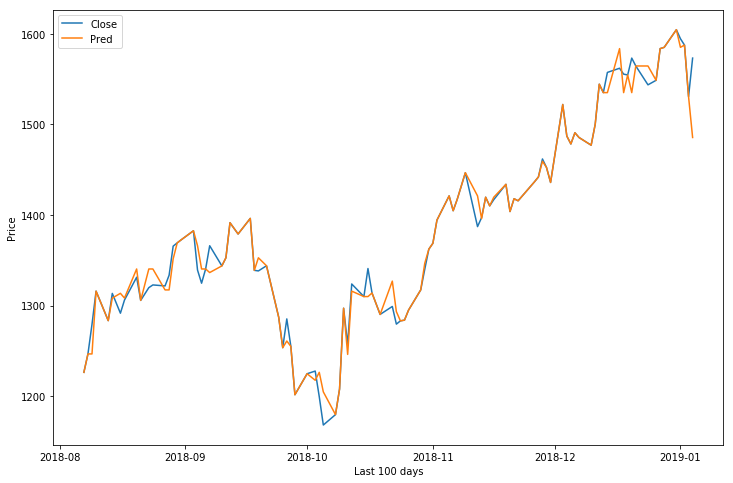

In [66]:
plt.figure(figsize=(12,8))
plt.plot(df_performance[['Close','Pred']])
plt.xlabel('Last 100 days')
plt.ylabel('Price')
plt.legend(['Close','Pred'])